## Gradient Descent for Linear Regression

### Goals:
Automate the process of optimizing $w$ and $b$ using Gradient Descent.

### Tools:
* Numpy
* Matplotlib
* plotting routines

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

### Problem Statement:
Let's use the same two data points as before - a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.

|Size (1000 sqft)|Price (1000s of dollars)|
|----------------|------------------------|
|1|300|
|2|500|

In [4]:
# Load our data set
x_train = np.array([1.0, 2.0])  # features
y_train = np.array([300.0, 500.0])  # target values

In [5]:
# Function to calculate cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

### Gradient Descent Summary
So far in this course, we have developed a linear model that predicts $f_{w,b}(x^{(i)})$

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training we measure the cost over all of our training samples $x^{(i)},y^{(i)}$

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{2}$$

In lecture, gradient descent was described as:
$$repeat \medspace until \medspace convergence \medspace \lbrace$$
$$w = w - \alpha \frac {\partial J(w,b)}{\partial w} \tag{3}$$
$$b = b - \alpha \frac {\partial J(w,b)}{\partial b}$$
$$\rbrace$$
where, parameters $w$, $b$ are updated simultaneously.

The gradient is defined as:
$$\frac {\partial J(w,b)}{\partial w} = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}$$
$$\frac {\partial J(w,b)}{\partial b} = \frac{1}{m} \sum\limits_{i = 0}^{m-1} f_{w,b}(x^{(i)}) - y^{(i)} \tag{5}$$
Here, simultaneously means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

### Implement Gradient Descent
We will implement gradient descent algorithm for one feature. We will need three functions.
* `compute_gradient` implementing equation (4) and (5) above
* `compute_cost` implementing equation (2)
* `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
* The naming of python variables containing partial derivatives follows this pattern, $\frac{\partial J(w,b)}{\partial b}$ will be `dj_db`.


In [6]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns:
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

Gradient descent utilizes the partial derivative of the cost with respect to a parameter at a point to update that parameter.
Let's use our `compute_gradient` function to find and plot some partial derivatives of our cost function relative to one of the parameters, $w_0$.

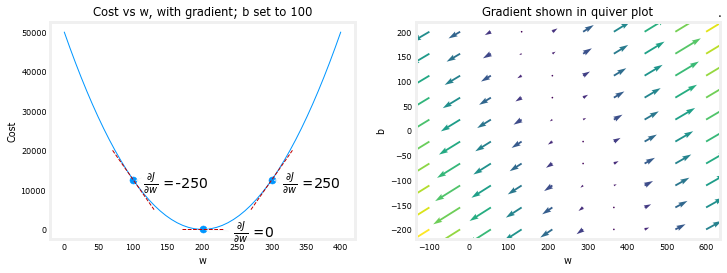

In [7]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()